In [1]:
1+1

2

In [2]:
## add helpful packages
using PGFPlots
using Interact
using Colors
using JLD
using Mmap
using GridInterpolations

include("../src/CSLVProblem_.jl")
include("../src/ParallelVI_.jl")
debris = load("../assets/debris.jld", "debris")
problem = CSLVProblem_.CSLVProblem(0., 0., 0., 0.);

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/09fd8ee52812e6c807867a8ec9fc73011eda4afb-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/09fd8ee52812e6c807867a8ec9fc73011eda4afb-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [3]:
problem.acGrid[1].cutPoints[3]; # heading
; # time of anomaly

In [4]:
a = RGB(1.,1.,1.) # white
b = RGB(.0,.6,.0) # green
c = RGB(.7,.9,.0) # neon green
d = RGB(.5,.5,.5) # grey
e = RGB(.0,.7,.5) # teal
f = RGB(.0,.0,.5) # dark blue

colors = [a; b; c; d; e; f]

In [5]:
## set old boundary
xEllipse = [32610.88497258722,30853.99592752435,29057.704761250094,27229.33503304424,25376.343013902104,23506.28617405547,21626.7912302343,19745.52190490307,17870.146551020538,16008.305796264774,14167.580360012316,12355.459194864128,10579.308101915387,8846.338965604977,7163.579749630955,5537.845390253171,3975.709717337977,2483.4785268145206,1067.1639208089123,-267.5399762868733,-1515.279826060004,-2671.0643179137182,-3730.283763122764,-4688.727969425025,-5542.602334315005,-6288.5421052050115,-6923.624764668075,-7445.380508886214,-7851.800797312318,-8141.344961155005,-8312.944867592018,-8366.007645636153,-8300.416488072515,-8116.529552030744,-7815.176988252454,-7397.656136188917,-6865.724928481132,-6221.593554217985,-5467.914435659689,-4607.770577742124,-3644.662353807057,-2582.4927945171826,-1425.5514499223755,-178.4968972175875,1153.6620312353057,2565.5862232976624,4051.627388199705,5605.850204688275,7222.055436563639,8893.803935313143,10614.441448928032,12377.124155542544,14174.844839930884,16000.459630456664,17846.71521339642,19706.2764408959,21571.754248044763,23435.733793566855,25290.802737645066,27129.57956920241,28944.741893729555,30729.054591402302,32475.39775388257,34176.79430683963,35826.4372238931,37417.71623651487,38944.243943324815,40399.88122143921,41778.76184195975,43075.31619148867,44284.294001756745,45400.7859901298,46420.244314903364,47338.50175106481,48151.78949452399,48856.75350581243,49450.46930788998,49930.455157049226,50294.683510916286,50541.59072330905,50670.0849020629,50679.55187308848,50569.859201532345,50341.358229298996,49994.88409700164,49531.75372773057,48953.76175985904,48263.17442618091,47462.721387133766,46555.5855364754,45545.39080854966,44436.18802706139,43232.4388460543,41938.997844384685,40561.092845408355,39104.303543697235,37574.538530288664,35978.01081726969,34321.2119711453,32610.88497258722]
yEllipse = [-42015.98153097936,-42421.75880334291,-42623.74221286279,-42621.10240012086,-42413.83678976857,-42002.769815624226,-41389.549768805475,-40576.64227872794,-39567.320451082574,-38365.651701128685,-36976.4813347578,-35405.41294369066,-33658.78569483763,-31743.64860719278,-29667.731922570216,-27439.415689005556,-25067.695687571224,-22562.1468448131,-19932.884283692452,-17190.522176031445,-14346.130568726625,-11411.190364534312,-8397.546645889388,-5317.360537017996,-2183.0598054973225,992.7115906331392,4197.144800104517,7417.318006871828,10640.248774614889,13852.946591017611,17042.46539551829,20195.955875022162,23300.717313955665,26344.24878771806,29314.299492261383,32198.918007042663,34986.500293857214,37665.83624026132,40226.15456306555,42657.165895006656,44949.10388582663,47092.76415785339,49079.540965470114,50901.46141770683,52551.21713346866,54022.19320959485,55308.494392919485,56404.96835888342,57307.226010722276,58011.65872510339,58515.452481949214,58816.598828293725,58913.90263810055,58806.98664220726,58496.29271472147,57983.07991439459,57269.41929162918,56358.18548378413,55253.04513344257,53958.44217600689,52479.58005469212,50822.40093234199,48993.56198071178,47000.408838779746,44850.946342275754,42553.8066369653,40118.21479813949,37553.95208838532,34871.31699484315,32081.08419587529,29194.46161528362,26223.04572992782,23178.775303739687,20073.88372766525,16920.850151064962,13732.349595327922,10521.202245093256,7300.322116374256,4082.6653040241704,881.178013369582,-2291.2554175128776,-5421.864297634352,-8498.042957786953,-11507.40151365305,-14437.815812603065,-17277.476361917958,-20014.936039556946,-22639.156392758283,-25139.552334783006,-27506.035055941575,-29729.052971653844,-31799.630537734927,-33709.40477121732,-35450.65932392704,-37016.35596562714,-38400.16334373695,-39596.482897531234,-40600.47181613879,-41408.06294163991,-42015.98153097936];

In [67]:
function specialInt(grid, qvalues, point)
    ids, probs = interpolants(grid, point)
    actionList = sum(qvalues[ids,:].*probs,dims=1)
    return argmax(actionList)[1]
end

function specialIntU(grid, qvalues, point)
    ids, probs = interpolants(grid, point)
    actionList = sum(qvalues[ids,:].*probs,dims=1)
    return -log(-maximum(actionList))
end

specialIntU (generic function with 1 method)

In [72]:
function polPlot(time, head, anom)
    qvalue, gridX, gridY = open("../results/qvalues_grid_$(time)", "r+") do f
        x = read(f, Int)
        y = read(f, Int)
        a = read(f, Int)
        b = read(f, Int)
        gridX = zeros(a)
        gridY = zeros(b)
        for i = 1:a
          gridX[i] = read(f, Float64)
        end
        for i = 1:b
          gridY[i] = read(f, Float64)
        end
        qvalue = Mmap.mmap(f, Matrix{Float64}, (x, y))
        qvalue, gridX, gridY
    end
    heading = head
    anomaly = anom
    grid = RectangleGrid(gridX, gridY, problem.acGrid[1].cutPoints[3], problem.acGrid[1].cutPoints[4])
    
   # xMin = gridX[1]
   # xMax = gridX[end]
   # yMin = gridY[1]
   # yMax = gridY[end]
    
    xMin= -79822.72531906192
    xMax= 129797.2079430933 
    yMin= -97478.72531906192
    yMax= 105388.2079430933
    
    tr = time
    trI = round(Int64,tr)

    if time > 73
        g = Axis([
            Plots.Image((x,y)->specialInt(grid, qvalue, [x, y, head, -1.]), zmax = 6., zmin = 1., (xMin, xMax), (yMin, yMax), colormap = ColorMaps.RGBArrayMap(colors), colorbar = false),
            ], xlabel="East (m)", ylabel="North (m)", title="Policy")
    else
        g = Axis([
            Plots.Image((x,y)->specialInt(grid, qvalue, [x, y, head, anom]), zmax = 6., zmin = 1., (xMin, xMax), (yMin, yMax), colormap = ColorMaps.RGBArrayMap(colors), colorbar = false),
            ], xlabel="East (m)", ylabel="North (m)", title="Policy")
    end
end

polPlot (generic function with 1 method)

In [69]:
function utilPlot(time, head, anom)
    qvalue, gridX, gridY = open("../results/qvalues_grid_$(time)", "r+") do f
        x = read(f, Int)
        y = read(f, Int)
        a = read(f, Int)
        b = read(f, Int)
        gridX = zeros(a)
        gridY = zeros(b)
        for i = 1:a
          gridX[i] = read(f, Float64)
        end
        for i = 1:b
          gridY[i] = read(f, Float64)
        end
        qvalue = Mmap.mmap(f, Matrix{Float64}, (x, y))
        qvalue, gridX, gridY
    end
    heading = head
    anomaly = anom
    
    grid = RectangleGrid(gridX, gridY, problem.acGrid[1].cutPoints[3], problem.acGrid[1].cutPoints[4])
    
    #xMin = grid.cutPoints[1][1]
    #xMax = grid.cutPoints[1][end]
    #yMin = grid.cutPoints[2][1]
    #yMax = grid.cutPoints[2][end]
        
    xMin=-79822.72531906192
    xMax=129797.2079430933 
    yMin=-97478.72531906192
    yMax=105388.2079430933
    
    tr = time
    trI = round(Int64,tr)

    if time > 73
        g = Axis([
            Plots.Image((x,y)->specialIntU(grid, qvalue, [x, y, head, -1.]), zmax = 10., zmin = 0., (xMin, xMax), (yMin, yMax)),
            ], xlabel="East (m)", ylabel="North (m)", title="Utility Values")
    else
        g = Axis([
            Plots.Image((x,y)->specialIntU(grid, qvalue, [x, y, head, anom]), zmax = 10., zmin = 0., (xMin, xMax), (yMin, yMax)),
            ], xlabel="East (m)", ylabel="North (m)", title="Utility Values")
    end
end

utilPlot (generic function with 1 method)

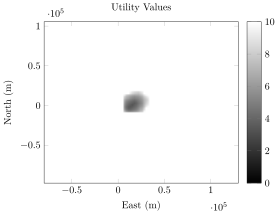

In [70]:
utilPlot(27, -135., 8.)

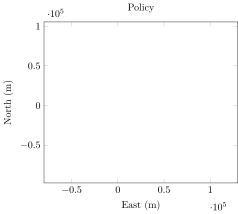

In [75]:
polPlot(50, -135., 8.)

In [45]:
a = RGB(1.,1.,1.) # white
b = RGB(.0,.6,.0) # green
c = RGB(.7,.9,.0) # neon green
d = RGB(.5,.5,.5) # grey
e = RGB(.0,.7,.5) # teal
f = RGB(.0,.0,.5) # dark blue

colors = [a; b; c; d; e; f]
#@manipulate for timeRemaining = 52.:1.:81.
    timeRemaining = 54.
    utilPlot(Int64(timeRemaining), -135., 8.)
# end

here
[-64845.6, -64075.7, -63305.8, -62535.9, -61765.9, -60996.0, -60226.1, -59456.2, -58686.3, -57916.4, -57146.4, -56376.5, -55606.6, -54836.7, -54066.8, -53296.9, -52527.0, -51757.0, -50987.1, -50217.2, -49447.3, -48677.4, -47907.5, -47137.5, -46367.6, -45597.7, -44827.8, -44057.9, -43288.0, -42518.1, -41748.1, -40978.2, -40208.3, -39438.4, -38668.5, -37898.6, -37128.6, -36358.7, -35588.8, -34818.9, -34049.0, -33279.1, -32509.1, -31739.2, -30969.3, -30199.4, -29429.5, -28659.6, -27889.7, -27119.7, -26349.8, -25579.9, -24810.0, -24040.1, -23270.2, -22500.2, -21730.3, -20960.4, -20190.5, -19420.6, -18650.7, -17880.8, -17110.8, -16340.9, -15571.0, -14801.1, -14031.2, -13261.3, -12491.3, -11721.4, -10951.5, -10181.6, -9411.68, -8641.76, -7871.85, -7101.93, -6332.02, -5562.1, -4792.19, -4022.27, -3252.35, -2482.44, -1712.52, -942.608, -172.692, 597.224, 1367.14, 2137.05, 2906.97, 3676.89, 4446.8, 5216.72, 5986.63, 6756.55, 7526.46, 8296.38, 9066.3, 9836.21, 10606.1, 11376.0, 12146.0, 129

MethodError: MethodError: objects of type Array{Float64,2} are not callable
Use square brackets [] for indexing an Array.